<a href="https://colab.research.google.com/github/findME0001/Minor-Project/blob/main/final_w_o_input_of_Satellite_Imagery_DeepLearning_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code from Part 1 Exercise - Satellite Imagery Data Preparation



In [ ]:
!pip install patchify


In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_root_folder = '/content/drive/MyDrive/'


In [ ]:
dataset_name = "india dataset"

In [ ]:
image_patch_size = 256

In [ ]:

import os

# Specify the root directory of the dataset

# Specify the image and mask folders
image_folder = 'train_images'

# Get sorted list of image names without extensions
sorted_names = sorted([os.path.splitext(name)[0] for name in os.listdir(os.path.join(dataset_root_folder,dataset_name, image_folder))])

print("Sorted Image Names:", sorted_names)


Sorted Image Names: ['PHOTO-2023-04-08-11-31-19', 'PHOTO-2023-04-08-11-31-19-1', 'PHOTO-2023-04-08-11-31-19-2', 'PHOTO-2023-04-08-11-31-19-3', 'PHOTO-2023-04-08-11-32-51', 'PHOTO-2023-04-08-11-32-51-1', 'PHOTO-2023-04-08-11-32-51-2', 'PHOTO-2023-04-08-11-32-51-3', 'PHOTO-2023-04-08-11-34-43', 'PHOTO-2023-04-08-11-34-43-1', 'PHOTO-2023-04-08-11-34-43-2', 'PHOTO-2023-04-08-11-34-43-3', 'PHOTO-2023-04-08-11-34-48', 'PHOTO-2023-04-08-11-34-48-1', 'PHOTO-2023-04-08-11-34-48-2', 'PHOTO-2023-04-08-11-34-48-3', 'PHOTO-2023-04-08-11-35-50', 'PHOTO-2023-04-08-11-35-50-1', 'PHOTO-2023-04-08-11-35-50-2', 'PHOTO-2023-04-08-11-35-50-3', 'PHOTO-2023-04-08-11-36-49', 'PHOTO-2023-04-08-11-36-49-1', 'PHOTO-2023-04-08-11-36-49-2', 'PHOTO-2023-04-08-11-36-49-3', 'PHOTO-2023-04-08-11-37-49', 'PHOTO-2023-04-08-11-37-49-1', 'PHOTO-2023-04-08-11-37-49-2', 'PHOTO-2023-04-08-11-37-49-3', 'PHOTO-2023-04-08-11-38-26', 'PHOTO-2023-04-08-11-38-26-1', 'PHOTO-2023-04-08-11-38-26-2', 'PHOTO-2023-04-08-11-38-26-3', 'PH

In [ ]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for name in sorted_names:
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/train_{image_type}/{name}.{image_extension}',1)
    if image is not None:
      if image_type == 'masks':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      #print(image.shape)
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape, size_x, size_y))
      image = Image.fromarray(image)
      image = image.crop((0,0, size_x, size_y))
      #print("({},  {})".format(image.size[0],image.size[1]))
      image = np.array(image)
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
      #print(len(patched_images))
      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          if image_type == 'images':
            individual_patched_image = patched_images[i,j,:,:]
            #print(individual_patched_image.shape)
            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
            individual_patched_image = individual_patched_image[0]
            #print(individual_patched_image.shape)
            image_dataset.append(individual_patched_image)
          elif image_type == 'masks':
            individual_patched_mask = patched_images[i,j,:,:]
            individual_patched_mask = individual_patched_mask[0]
            mask_dataset.append(individual_patched_mask)

In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

74
74


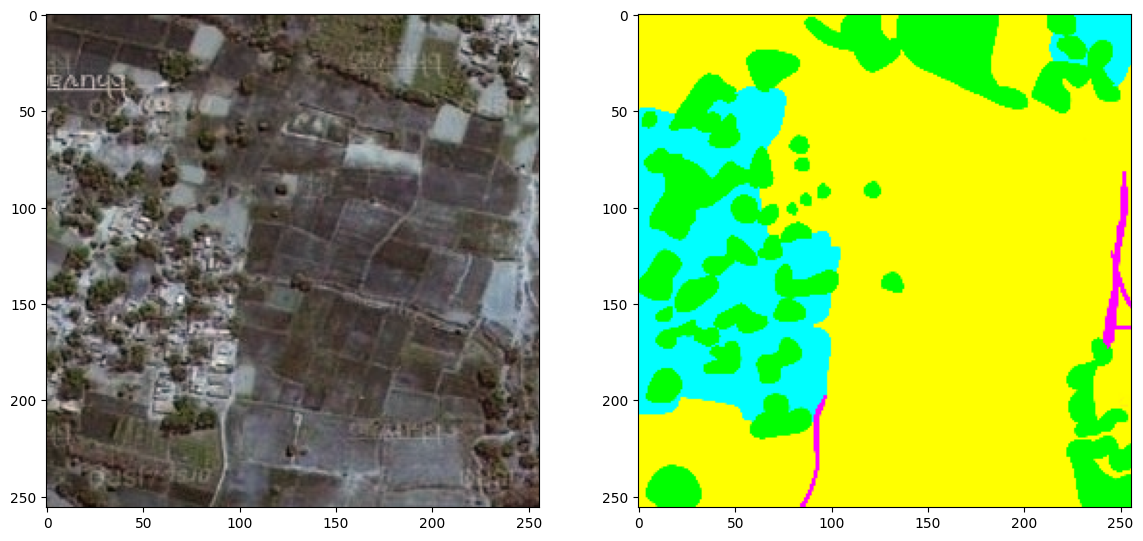

In [ ]:

random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [ ]:
class_urban = np.array([0, 255, 255], dtype=np.uint8)
print(class_urban)

class_water = np.array([0, 0, 255], dtype=np.uint8)
print(class_water)

class_forest = np.array([0, 255, 0], dtype=np.uint8)
print(class_forest)

class_agriculture =  np.array([255, 255, 0], dtype=np.uint8)
print(class_agriculture)

class_road =  np.array([255, 0, 255], dtype=np.uint8)
print(class_road)

[  0 255 255]
[  0   0 255]
[  0 255   0]
[255 255   0]
[255   0 255]


In [ ]:
label = individual_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_urban, axis=-1)] = 0
  label_segment[np.all(label == class_road, axis=-1)] = 0
  label_segment[np.all(label == class_forest, axis=-1)] = 1
  label_segment[np.all(label == class_agriculture, axis=-1)] = 0
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [ ]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [ ]:
np.unique(labels)

array([0, 1], dtype=uint8)

In [ ]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1]


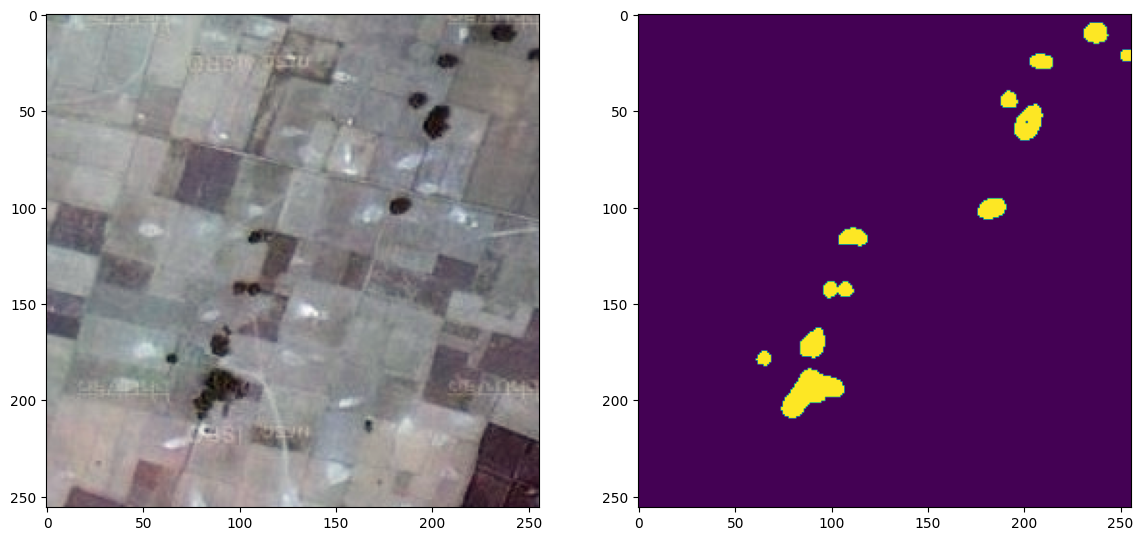

In [ ]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [ ]:
total_classes = len(np.unique(labels))

In [ ]:
total_classes

2

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [ ]:
master_trianing_dataset = image_dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62, 256, 256, 3)
(12, 256, 256, 3)
(62, 256, 256, 2)
(12, 256, 256, 2)


In [ ]:


image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


# Coding for Part 2: Deep Learning with Satellite Imagery Data

In [ ]:
# !pip install --upgrade keras

$ pip install git+https://github.com/qubvel/segmentation_models

In [ ]:
! pip install segmentation-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from keras import backend as K

In [ ]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = tf.keras.backend.flatten(y_true)
  y_pred_flatten = tf.keras.backend.flatten(y_pred)
  intersection = tf.reduce_sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (tf.reduce_sum(y_true_flatten) + tf.reduce_sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [ ]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [ ]:
metrics = ["accuracy", jaccard_coef]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model()

In [ ]:
# Please uncomment this line to get model confiuration
# model.get_config()

## Generating Loss Function

- dice loss > Focal Loss > Total Loss
- Total Loss = (Dice loss + (1*Focal Loss))

In [ ]:
weights = [0.5,0.5]

In [ ]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [ ]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [ ]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [ ]:
total_loss = dice_loss + (1 * focal_loss)

## Model compilation

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=20,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/20
4/4 [==============================] - 44s 4s/step - loss: 0.8085 - accuracy: 0.6319 - jaccard_coef: 0.3416 - val_loss: 0.8032 - val_accuracy: 0.8966 - val_jaccard_coef: 0.3707
Epoch 2/20
4/4 [==============================] - 1s 219ms/step - loss: 0.7814 - accuracy: 0.8432 - jaccard_coef: 0.4710 - val_loss: 0.7755 - val_accuracy: 0.8970 - val_jaccard_coef: 0.4794
Epoch 3/20
4/4 [==============================] - 1s 202ms/step - loss: 0.7654 - accuracy: 0.8668 - jaccard_coef: 0.5638 - val_loss: 0.7660 - val_accuracy: 0.8970 - val_jaccard_coef: 0.5327
Epoch 4/20
4/4 [==============================] - 1s 213ms/step - loss: 0.7612 - accuracy: 0.8680 - jaccard_coef: 0.5751 - val_loss: 0.7618 - val_accuracy: 0.8970 - val_jaccard_coef: 0.5485
Epoch 5/20
4/4 [==============================] - 1s 212ms/step - loss: 0.7577 - accuracy: 0.8682 - jaccard_coef: 0.5831 - val_loss: 0.7555 - val_accuracy: 0.8970 - val_jaccard_coef: 0.5819
Epoch 6/20
4/4 [==============================] - 1s

In [ ]:
# model.compile(optimizer="adam", loss=total_loss, metrics=metrics)
# model_history = model.fit(X_train, y_train,
#                           batch_size=16,
#                           verbose=1,
#                           epochs=10,
#                           validation_data=(X_test, y_test),
#                           shuffle=False)

In [ ]:
# # Import necessary libraries
# import tensorflow as tf
# from tensorflow.keras import layers

# # Define the jaccard_coef function
# def jaccard_coef(y_true, y_pred):
#     y_true_flatten = tf.keras.backend.flatten(y_true)
#     y_pred_flatten = tf.keras.backend.flatten(y_pred)
#     intersection = tf.keras.backend.sum(y_true_flatten * y_pred_flatten)
#     final_coef_value = (intersection + 1.0) / (tf.keras.backend.sum(y_true_flatten) + tf.keras.backend.sum(y_pred_flatten) - intersection + 1.0)
#     return final_coef_value

# # Define the model


# # Compile the model
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[jaccard_coef])

# # Train the model
# model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# # Evaluate the model
# model.evaluate(X_test, y_test)

In [ ]:
# !pip install --upgrade keras

In [ ]:
history_a = model_history

In [ ]:
history_a.history

{'loss': [0.8084975481033325,
  0.7813999056816101,
  0.7654292583465576,
  0.7612294554710388,
  0.7577428221702576,
  0.7531293034553528,
  0.7449178099632263,
  0.7328373193740845,
  0.7238771319389343,
  0.7176088690757751,
  0.7158172130584717,
  0.7109116911888123,
  0.7051059007644653,
  0.7032474279403687,
  0.6968169212341309,
  0.6933919191360474,
  0.6917574405670166,
  0.6854034066200256,
  0.6828523278236389,
  0.6877633333206177],
 'accuracy': [0.6319191455841064,
  0.8431777954101562,
  0.8667725324630737,
  0.8680058121681213,
  0.8681913614273071,
  0.8682457804679871,
  0.868261992931366,
  0.8682718873023987,
  0.8683368563652039,
  0.8652077913284302,
  0.8503944873809814,
  0.8284914493560791,
  0.801371157169342,
  0.8119728565216064,
  0.8171539306640625,
  0.8250584602355957,
  0.8398450016975403,
  0.8361331820487976,
  0.8489158153533936,
  0.872212827205658],
 'jaccard_coef': [0.34155574440956116,
  0.47098055481910706,
  0.5637909173965454,
  0.5750735998153

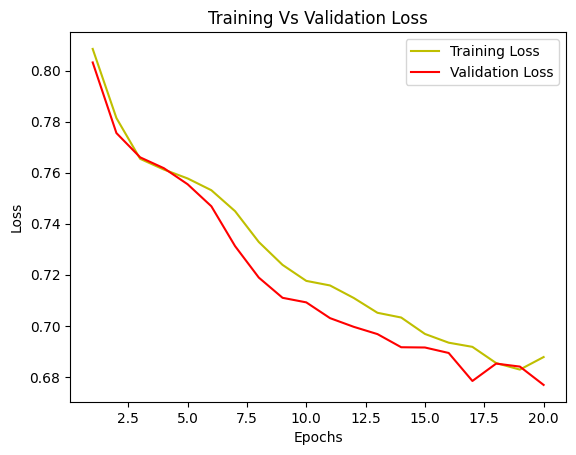

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

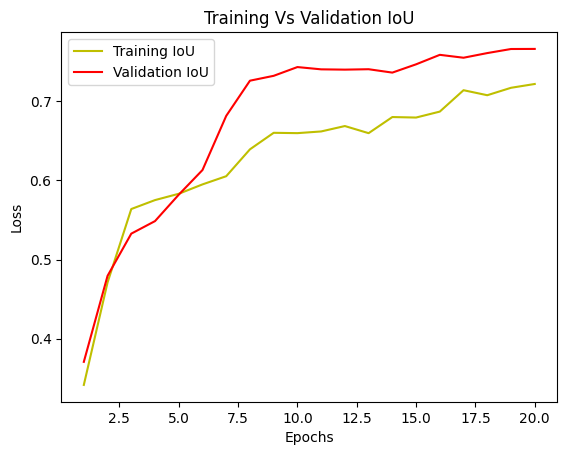

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:
model_history.params

{'verbose': 1, 'epochs': 20, 'steps': 4}

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 265ms/step


In [ ]:
len(y_pred)

12

In [ ]:
y_pred

array([[[[0.5006612 , 0.49933884],
         [0.50019616, 0.49980384],
         [0.50184894, 0.498151  ],
         ...,
         [0.5007824 , 0.49921763],
         [0.50183284, 0.4981671 ],
         [0.5032373 , 0.49676266]],

        [[0.4974623 , 0.50253767],
         [0.49660376, 0.5033962 ],
         [0.49811408, 0.50188595],
         ...,
         [0.49145317, 0.5085468 ],
         [0.499894  , 0.500106  ],
         [0.5055514 , 0.49444863]],

        [[0.5021059 , 0.49789414],
         [0.49685648, 0.50314355],
         [0.5065118 , 0.49348825],
         ...,
         [0.49734038, 0.5026596 ],
         [0.50200605, 0.49799395],
         [0.507858  , 0.49214205]],

        ...,

        [[0.61637133, 0.38362864],
         [0.7412237 , 0.25877628],
         [0.8235932 , 0.17640677],
         ...,
         [0.7266869 , 0.2733131 ],
         [0.64820474, 0.35179526],
         [0.57695764, 0.4230423 ]],

        [[0.5930113 , 0.4069887 ],
         [0.6679119 , 0.33208814],
         [0.

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [ ]:
len(y_pred_argmax)

12

In [ ]:
y_pred_argmax

array([[[0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 0],
        [0, 1, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test_argmax = np.argmax(y_test, axis=3)

In [ ]:
y_test_argmax

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 

## Comparing prediction results
-  using test images using mask images and predicted result images..

In [ ]:
import random


In [ ]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 1s 854ms/step


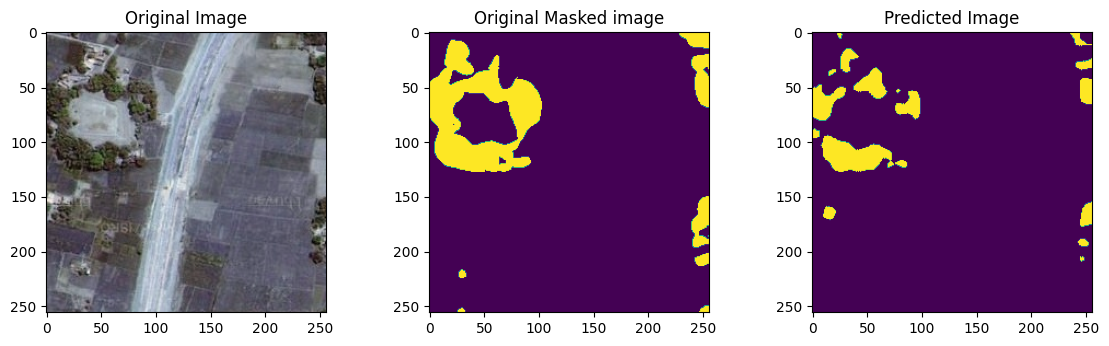

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [ ]:
# model.save("satellite_segmentation_full.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# !ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Apr 19 15:21 .
drwxr-xr-x 1 root root 4.0K Apr 19 14:45 ..
drwxr-xr-x 4 root root 4.0K Apr 17 13:29 .config
drwx------ 5 root root 4.0K Apr 19 14:49 drive
drwxr-xr-x 1 root root 4.0K Apr 17 13:29 sample_data
-rw-r--r-- 1 root root  23M Apr 19 16:35 satellite_segmentation_full.h5


# **Prediction & Result**

IOU = true_positive / (true_positive + false_positive + false_negative).



1/1 [==============================] - 0s 20ms/step


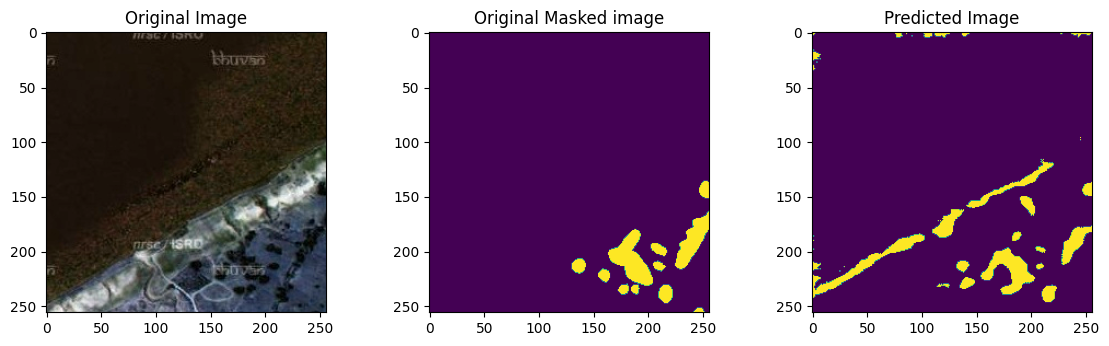

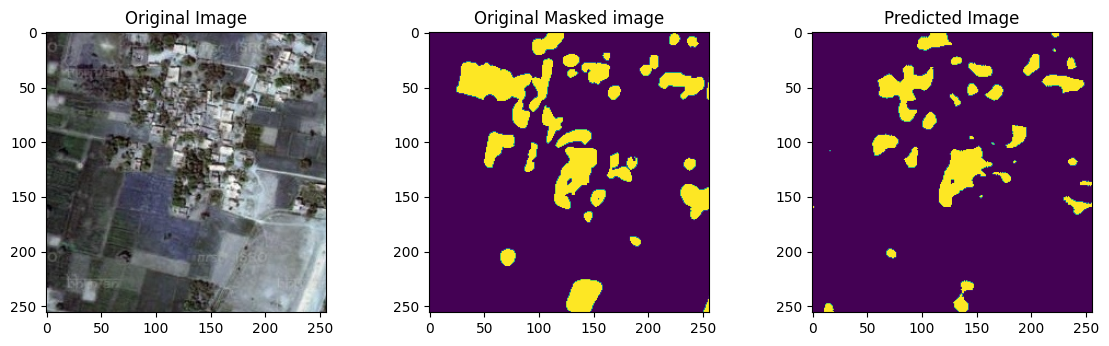

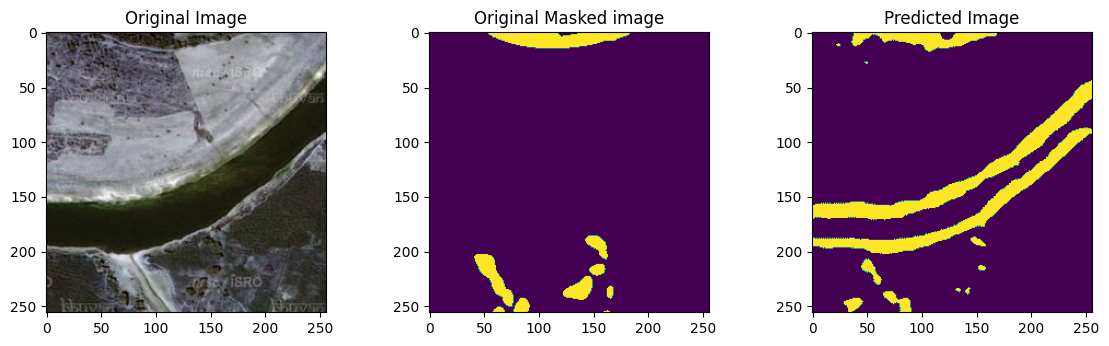

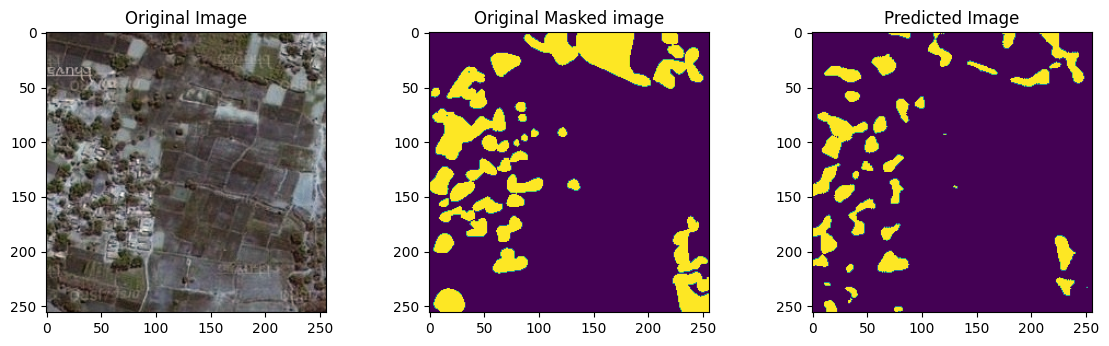

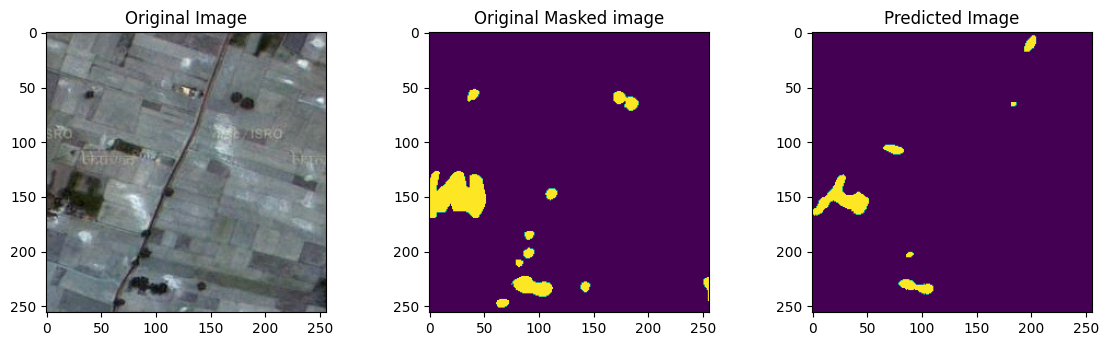

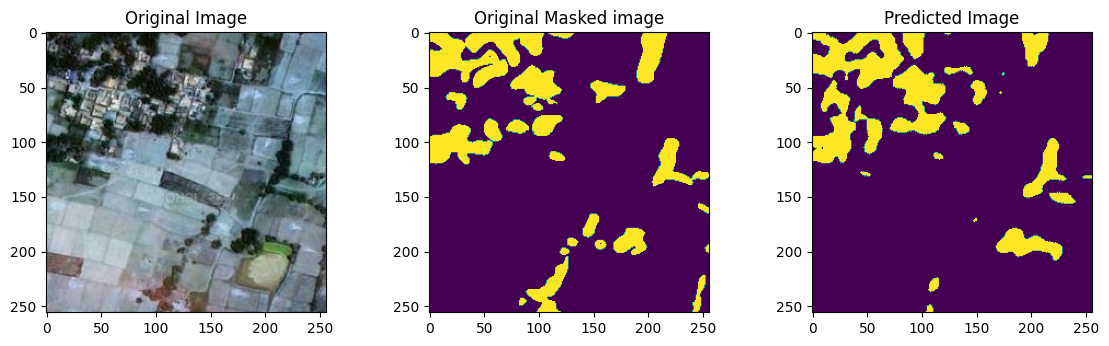

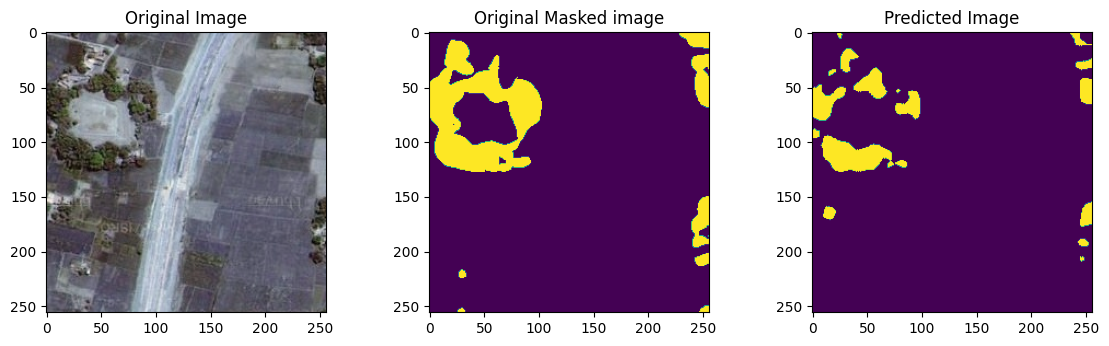

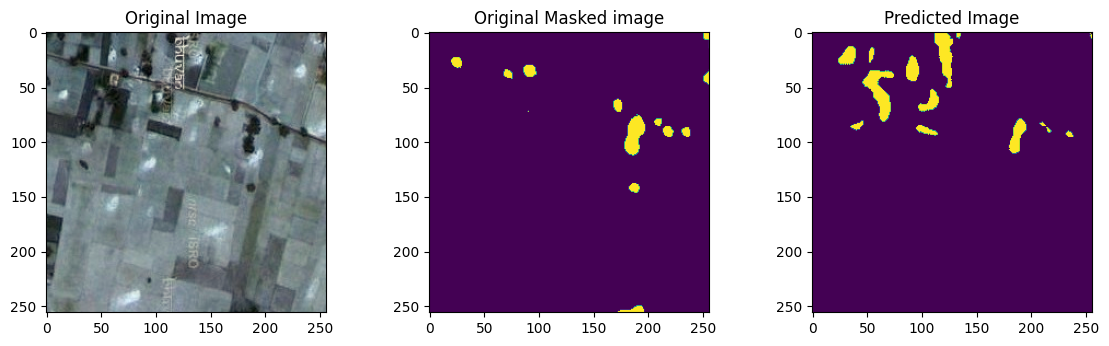

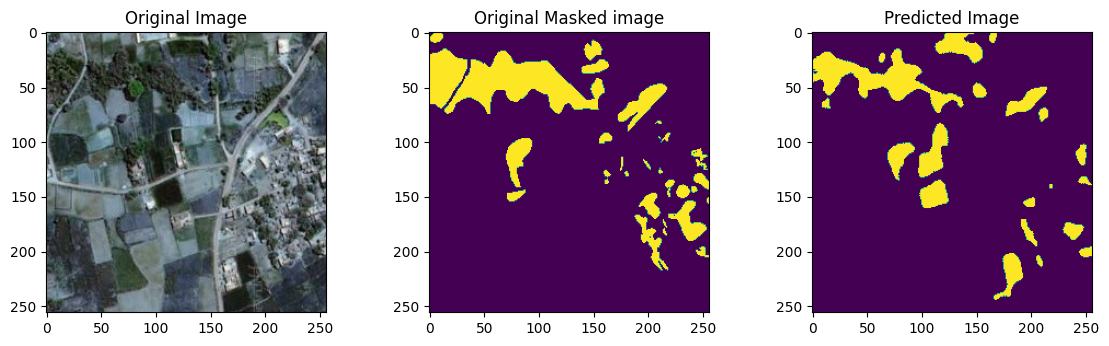

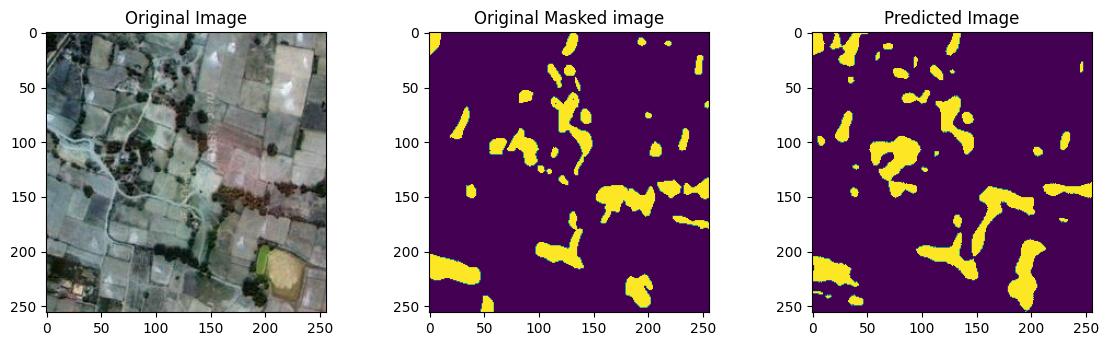

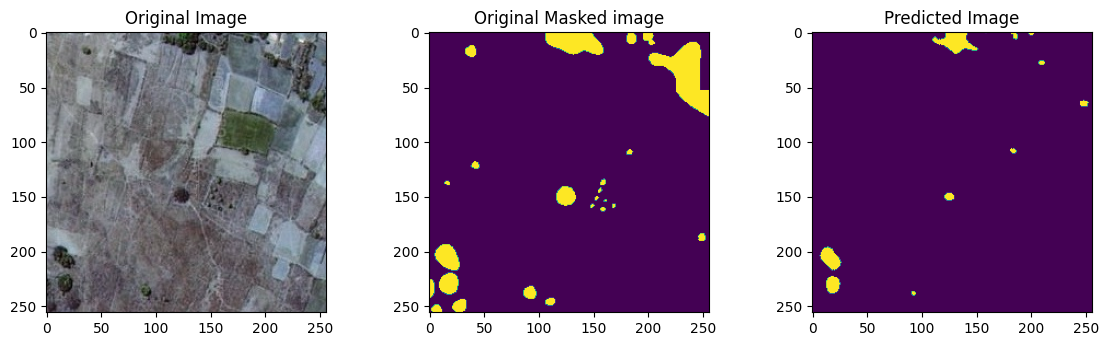

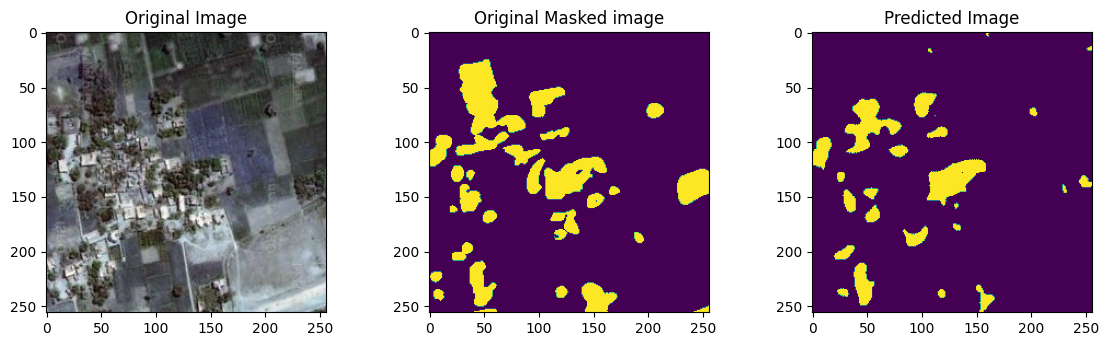

In [ ]:
import matplotlib.pyplot as plt

# Define the number of classes
num_classes = 2

# Initialize MeanIoU object
IOU_keras = MeanIoU(num_classes=num_classes)

# Iterate over each test image
for i in range(len(X_test)):
    # Get the test image and ground truth mask
    test_image = X_test[i]
    ground_truth_image = y_test_argmax[i]

    # Expand dimensions to match model input shape
    test_image_input = np.expand_dims(test_image, 0)

    # Predict segmentation mask
    prediction = model.predict(test_image_input)
    predicted_image = np.argmax(prediction, axis=3)
    predicted_image = predicted_image[0]

    # Update MeanIoU state with ground truth and predicted masks
    IOU_keras.update_state(ground_truth_image, predicted_image)

    # Plot the images
    plt.figure(figsize=(14, 8))
    plt.subplot(231)
    plt.title("Original Image")
    plt.imshow(test_image)
    plt.subplot(232)
    plt.title("Original Masked image")
    plt.imshow(ground_truth_image)
    plt.subplot(233)
    plt.title("Predicted Image")
    plt.imshow(predicted_image)

# **Result**

In [ ]:
print("Mean IoU =", mean_iou)


Mean IoU = 0.65268207


In [ ]:

# Get the IoU matrix values
values = np.array(IOU_keras.get_weights()).reshape(num_classes, num_classes)

# Print the IoU matrix
print("IoU Matrix:")
print(values)


IoU Matrix:
[[681511.  23915.]
 [ 39974.  41032.]]


In [ ]:
# Calculate IoU for each class
class1_IoU = values[0, 0] / (values[0, 0] + np.sum(values[0, :]) + np.sum(values[:, 0]) - values[0, 0])
class2_IoU = values[1, 1] / (values[1, 1] + np.sum(values[1, :]) + np.sum(values[:, 1]) - values[1, 1])

# Print the calculated IoU values for each class
print("IoU for Class 1:", class1_IoU)
print("IoU for Class 2:", class2_IoU)


IoU for Class 1: 0.47761282
IoU for Class 2: 0.2811316
